Importok

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Beolvasás

In [ ]:
df = pd.read_csv('laptop.csv', sep=',')
print(df.head())

df.drop(['Battery_Life'], axis=1, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True) # ID should not be used as a feature
df.drop(['Name'], axis=1, inplace=True) # Too much work to extract information from the name
df.head(20)

   Unnamed: 0    Brand                                               Name  \
0           0       HP  HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...   
1           1   Lenovo  Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....   
2           3     Dell  Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...   
3           4       HP  HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...   
4           6  Infinix  Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...   

   Price            Processor_Name Processor_Brand    RAM_Expandable      RAM  \
0  22990        MediaTek Octa-core        MediaTek    Not Expandable     4 GB   
1  36289     AMD Hexa-Core Ryzen 5             AMD  12 GB Expandable     8 GB   
2  78500  Intel Core i5 (12th Gen)           Intel  32 GB Expandable    16 GB   
3  55490  Intel Core i5 (12th Gen)           Intel   8 GB Expandable     8 GB   
4  21990  Intel Core i3 (11th Gen)           Intel    Not Expandable  8 GB LP   

      RAM_TYPE                Ghz Display_type Dis

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no
4,Infinix,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45
5,Acer,34990,Intel Core i5 (11th Gen) Processor,Intel,32 GB Expandable,16 GB,DDR4 RAM,0,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45
6,HP,49599,AMD Hexa-Core Ryzen 5,AMD,16 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,14,Radeon,AMD,512 GB SSD Storage,No HDD,65
7,Acer,39990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,2.5 Ghz Processor,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45
8,Lenovo,33111,Intel Core i3 (8th Gen),Intel,12 GB Expandable,4 GB,DDR4 RAM,2.2 Ghz Processor,LED,15.6,UHD 620,Intel,NO SSD,1024 GB HDD Storage,45
9,ASUS,48990,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,2.9 Ghz Processor,LCD,15.6,"GeForce RTX 2050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150


<ipython-input-27-a13a27666ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


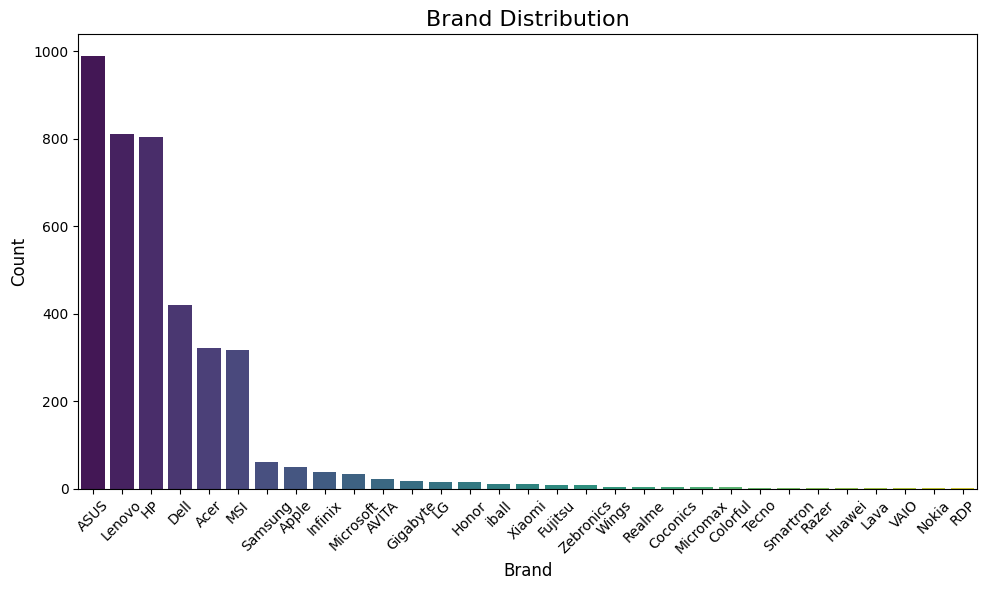

<ipython-input-27-a13a27666ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


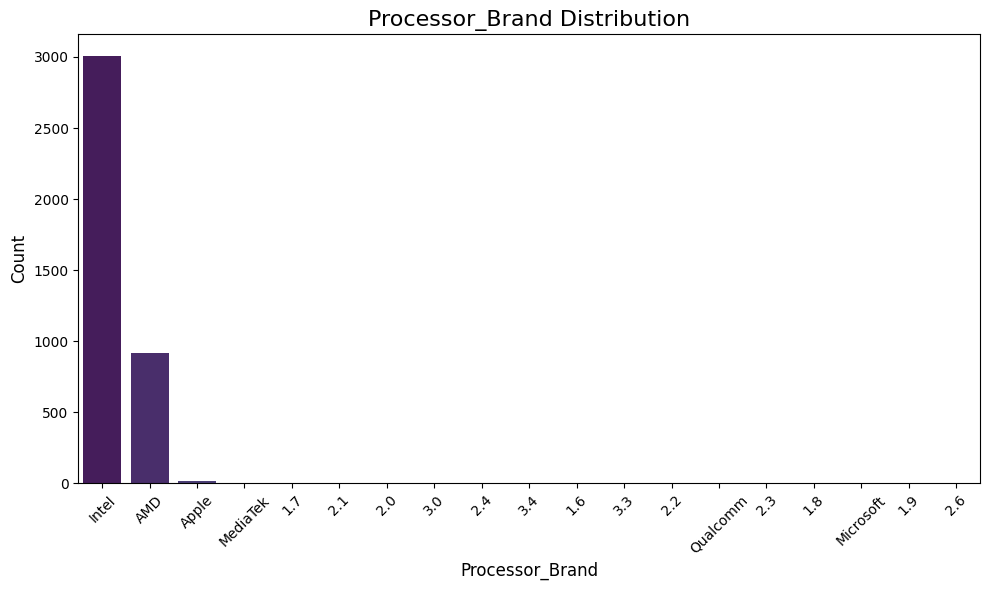

<ipython-input-27-a13a27666ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


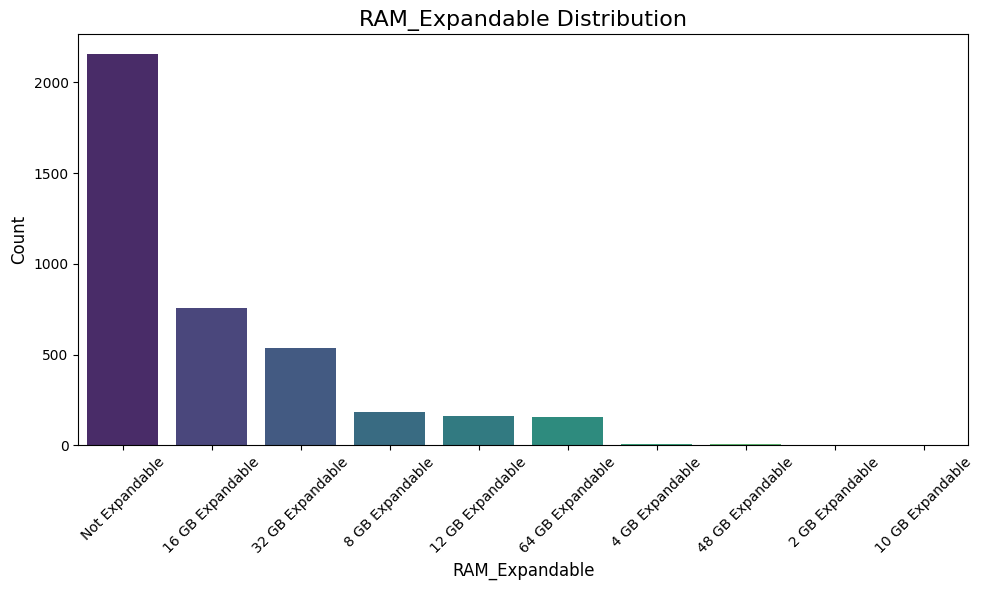

<ipython-input-27-a13a27666ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


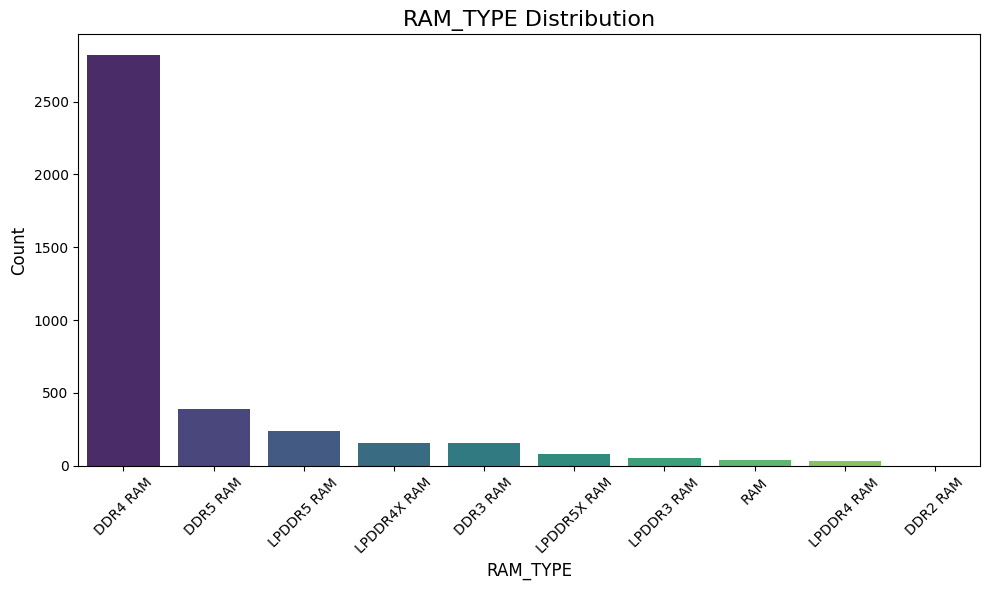

<ipython-input-27-a13a27666ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


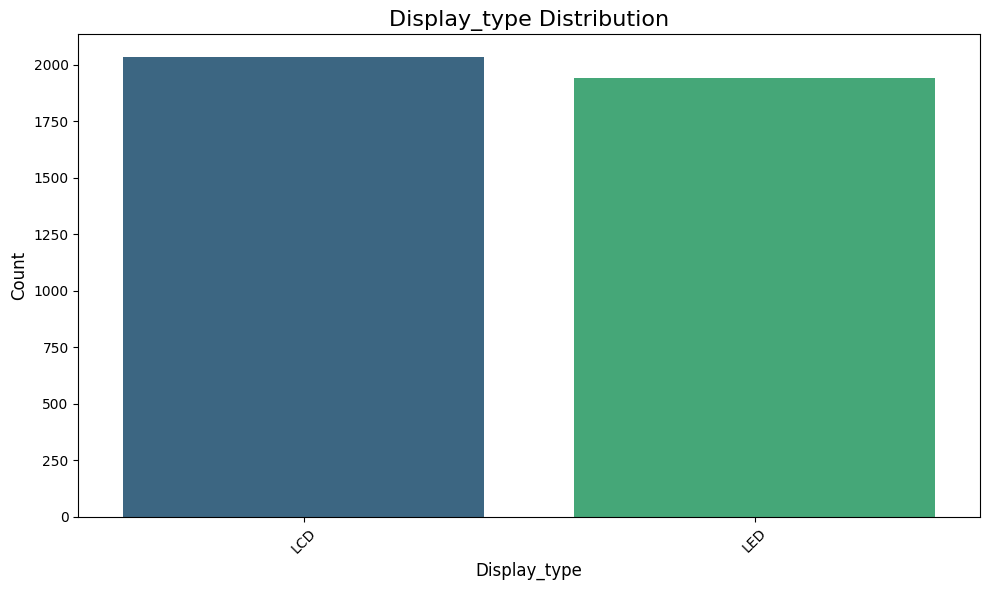

<ipython-input-27-a13a27666ec3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


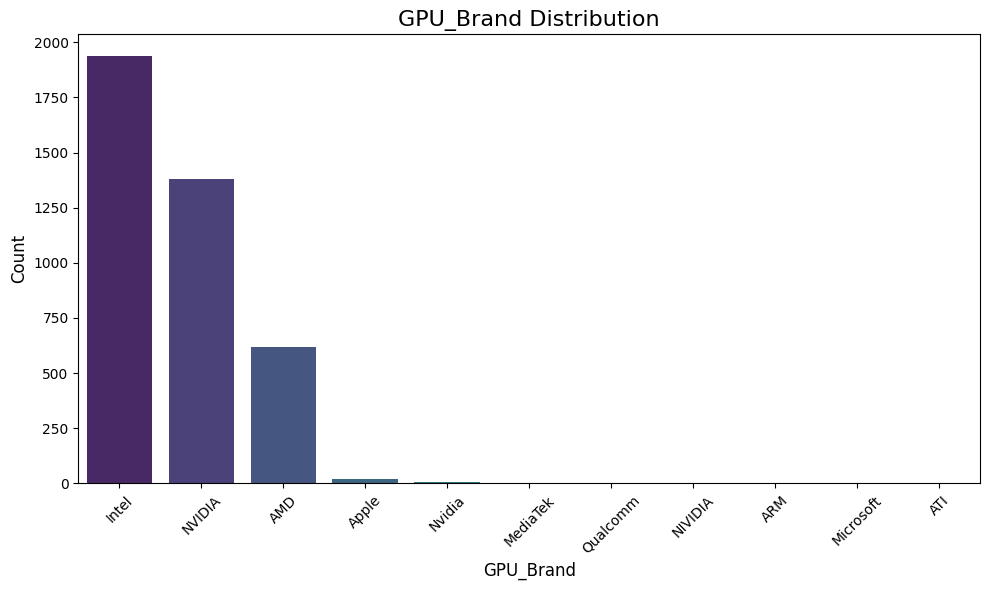

In [ ]:
columns_to_show = ['Brand', 'Processor_Brand', 'RAM_Expandable', 'RAM_TYPE', 'Display_type','GPU_Brand']

for col in columns_to_show:
    plt.figure(figsize=(10, 6))
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.title(f'{col} Distribution', fontsize=16)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-28-c8c1af4ccb91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Price'], palette="viridis")


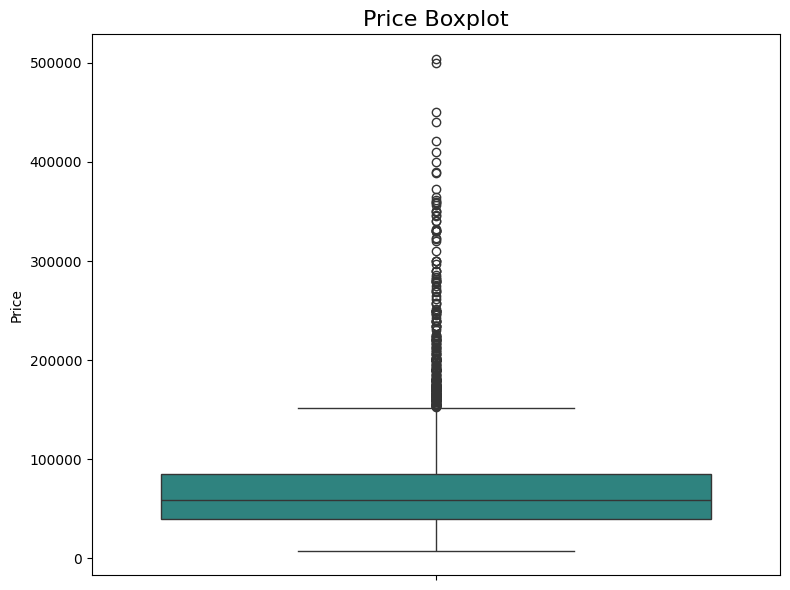

In [ ]:
# Check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price'], palette="viridis")
plt.title('Price Boxplot', fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-29-bc43647eec5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


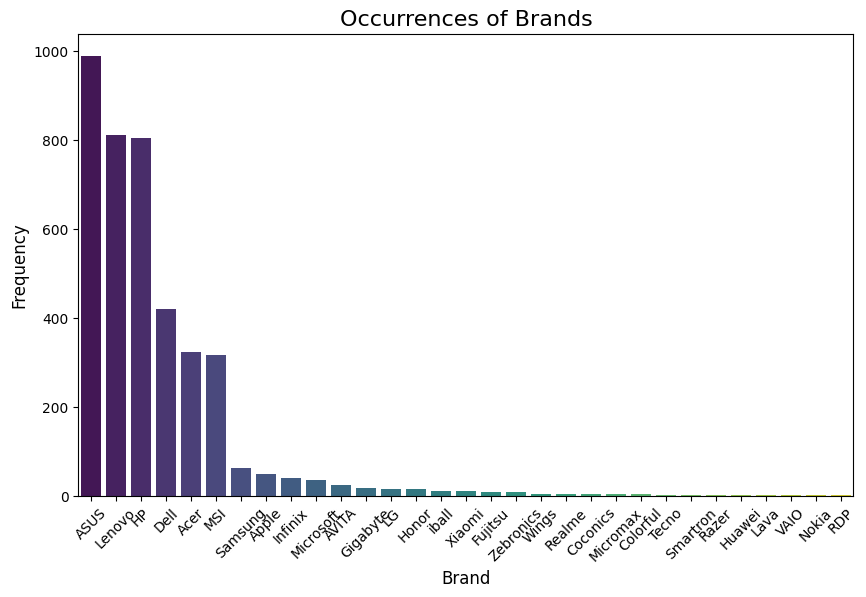

In [ ]:
brand_counts = df['Brand'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Occurrences of Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Not enough samples for these brands
brands_to_drop = ['Infinix', 'AVITA', 'iball', 'Zebronics', 'Wings',
                  'Realme', 'Coconics', 'Micromax', 'Colorful', 'Tecno',
                  'Smartron', 'Lava', 'VAIO', 'RDP', 'Nokia',
                  'LG', 'Honor', 'Xiaomi', 'Razer', 'Huawei']

df = df[~df['Brand'].isin(brands_to_drop)]

df.reset_index(drop=True, inplace=True)


<ipython-input-31-bc43647eec5e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


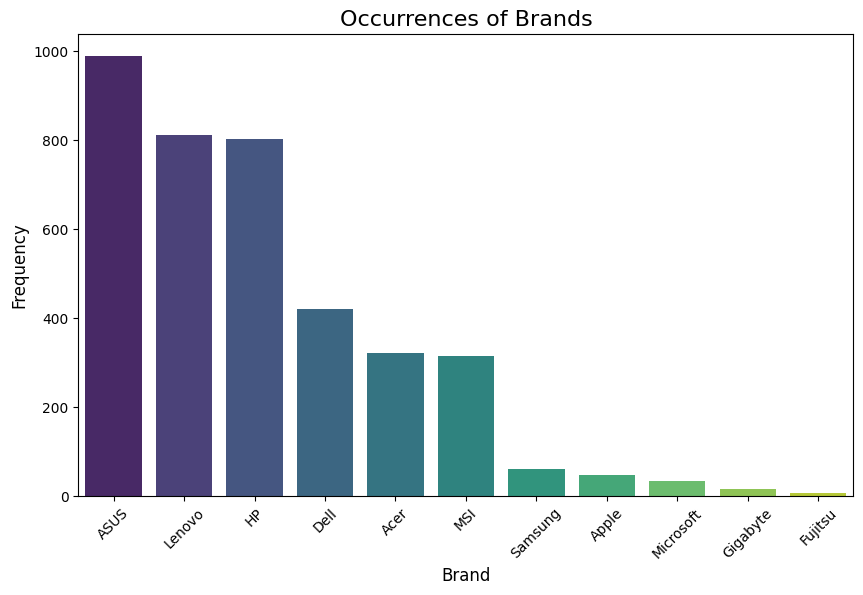

In [ ]:
brand_counts = df['Brand'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Occurrences of Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Remove outliers (price)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

old_size = len(df)
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
new_size = len(df)

print(f"Before cleaning: {old_size}")
print(f"After cleaning: {new_size}")

Before cleaning: 3830
After cleaning: 3559


<ipython-input-33-c8c1af4ccb91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Price'], palette="viridis")


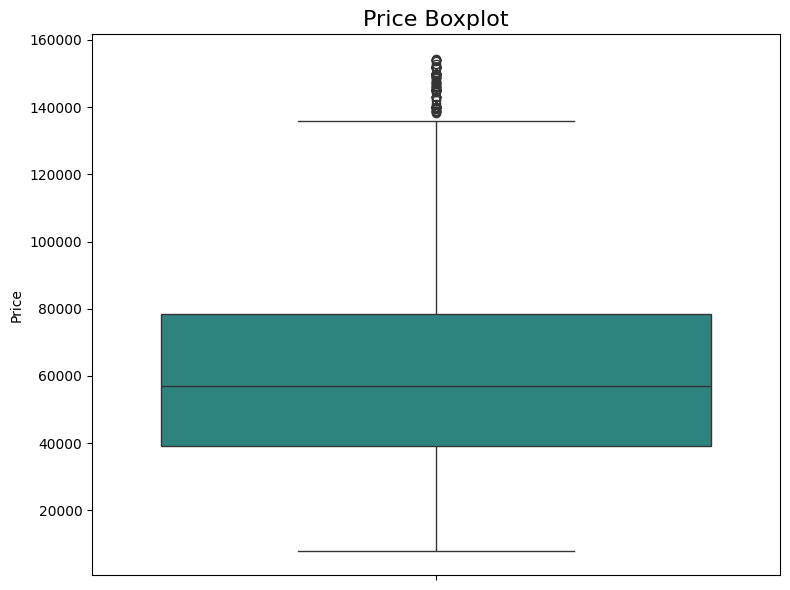

In [ ]:
# Price boxplot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price'], palette="viridis")
plt.title('Price Boxplot', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
df.head(20)

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
0,HP,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no
4,Acer,34990,Intel Core i5 (11th Gen) Processor,Intel,32 GB Expandable,16 GB,DDR4 RAM,0,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45
5,HP,49599,AMD Hexa-Core Ryzen 5,AMD,16 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,14,Radeon,AMD,512 GB SSD Storage,No HDD,65
6,Acer,39990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,2.5 Ghz Processor,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45
7,Lenovo,33111,Intel Core i3 (8th Gen),Intel,12 GB Expandable,4 GB,DDR4 RAM,2.2 Ghz Processor,LED,15.6,UHD 620,Intel,NO SSD,1024 GB HDD Storage,45
8,ASUS,48990,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,2.9 Ghz Processor,LCD,15.6,"GeForce RTX 2050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150
9,Lenovo,92990,AMD Octa-Core Ryzen 7,AMD,16 GB Expandable,16 GB,DDR5 RAM,3.4 Ghz Processor,LCD,15.6,"GeForce RTX 4050 GPU, 6 GB",NVIDIA,512 GB SSD Storage,No HDD,170


<ipython-input-35-0a371b511a36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


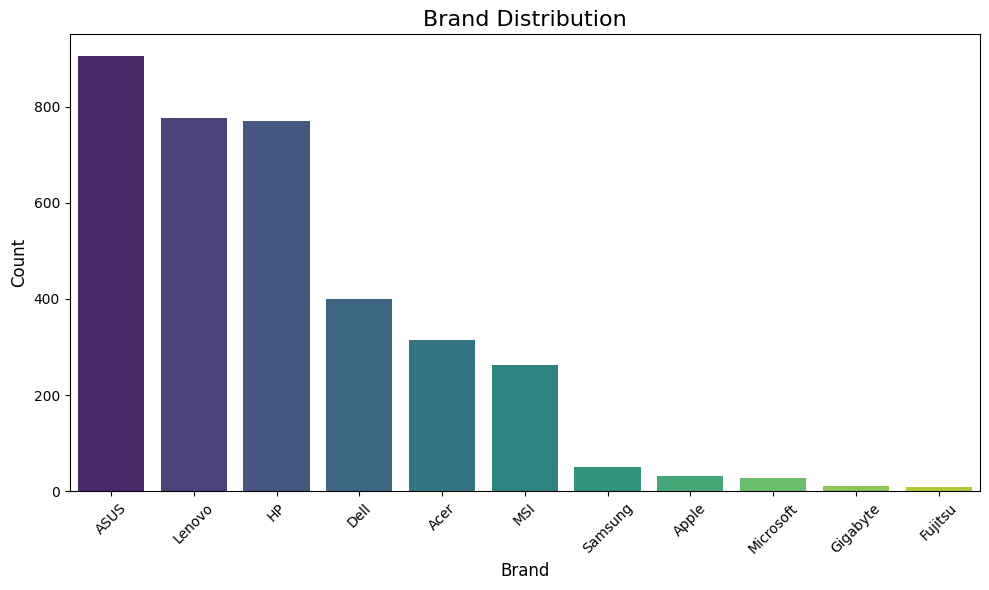

<ipython-input-35-0a371b511a36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


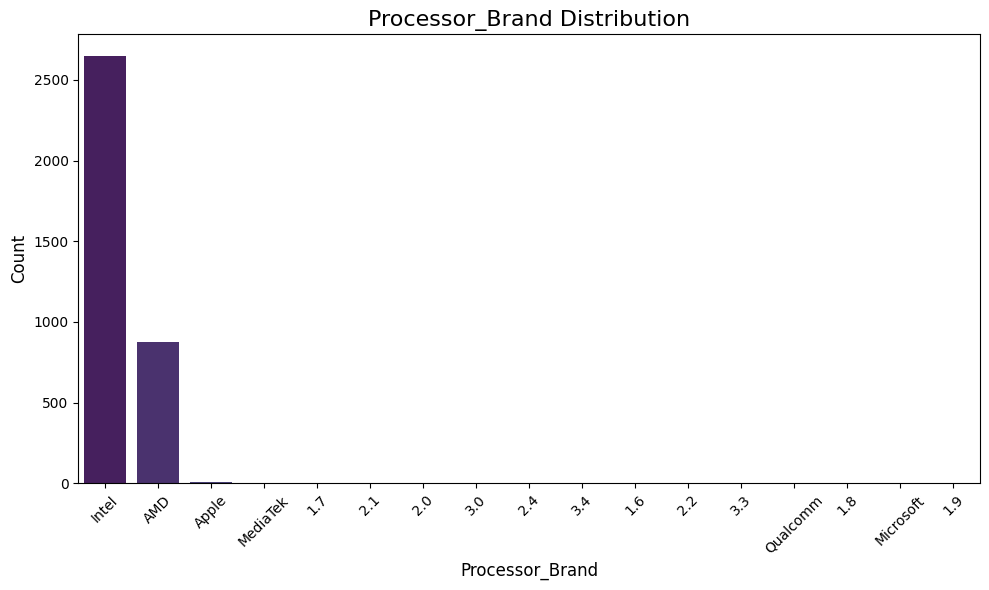

<ipython-input-35-0a371b511a36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


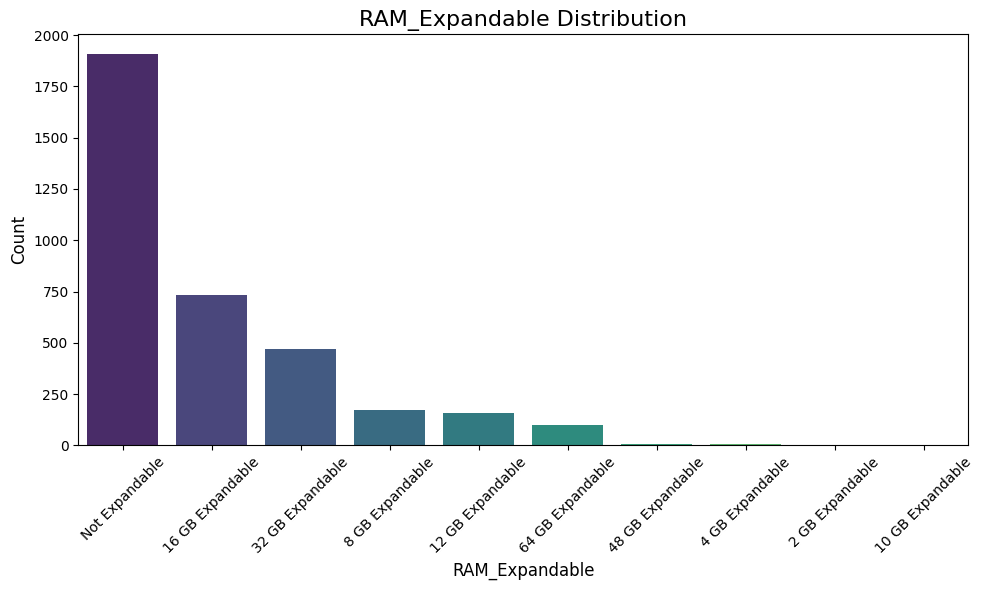

<ipython-input-35-0a371b511a36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


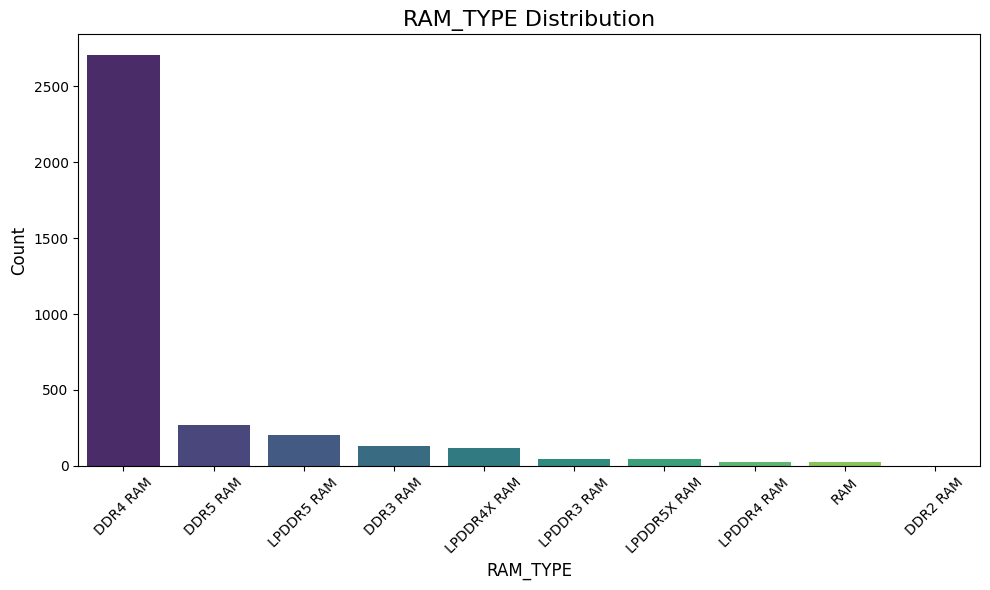

<ipython-input-35-0a371b511a36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


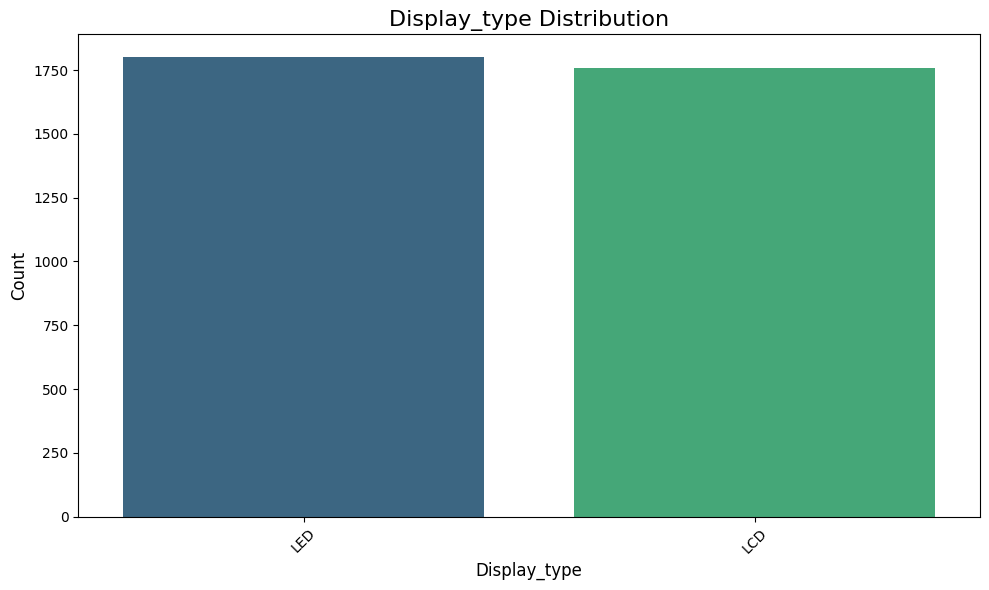

<ipython-input-35-0a371b511a36>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


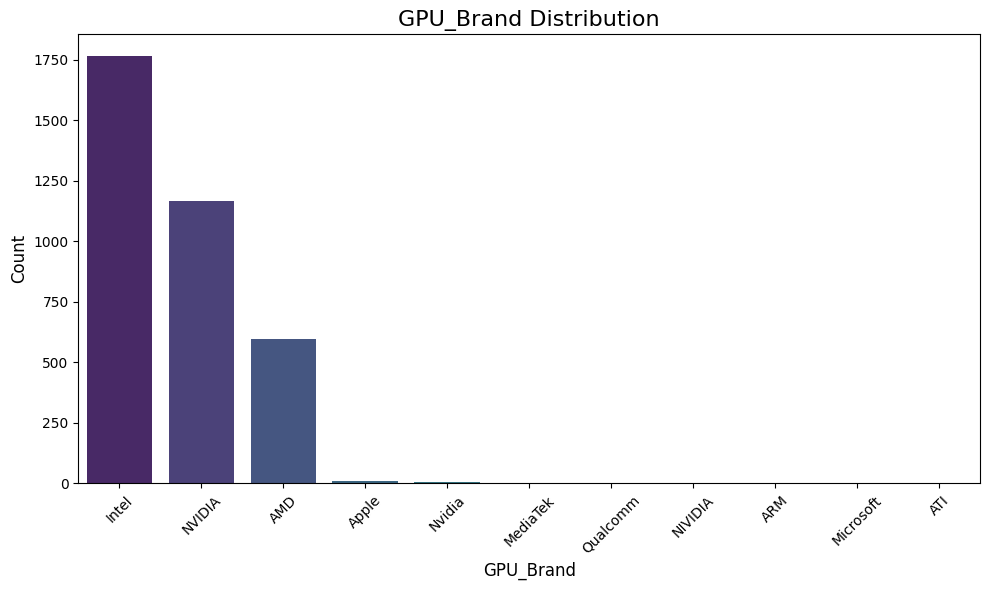

In [ ]:
for col in columns_to_show:
    plt.figure(figsize=(10, 6))
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.title(f'{col} Distribution', fontsize=16)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
#df = df[df['Processor_Brand'].isin(['AMD', 'Intel'])]
#df = df[df['GPU_Brand'] != 'ATI']
df.drop(['RAM_TYPE'], axis=1, inplace=True)
# Ram type: No point, remove it

In [ ]:
pd.set_option('display.max_rows', None)

attributes = df.columns.tolist()
attributes.remove('Price')

for attribute in attributes:
  print(df[attribute].value_counts().sort_values(ascending=False))
  print('\n\n\n\n')

unique_values_dict = {}

for attribute in attributes:
    unique_values_dict[attribute] = df[attribute].unique().tolist()

for attribute, unique_values in unique_values_dict.items():
    print(f"Unique values for {attribute}:")
    print(unique_values)
    print('\n' + '-'*50 + '\n')

pd.reset_option('display.max_rows')

Brand
ASUS         905
Lenovo       776
HP           771
Dell         400
Acer         315
MSI          263
Samsung       51
Apple         32
Microsoft     27
Gigabyte      11
Fujitsu        8
Name: count, dtype: int64





Processor_Name
Intel Core i5 (11th Gen)              302
Intel Core i5 (12th Gen)              282
AMD Hexa-Core Ryzen 5                 240
AMD Octa-Core Ryzen 7                 227
Intel Core i3 (11th Gen)              179
Intel Core i5 (8th Gen)               168
Intel Core i5 (10th Gen)              161
Intel Core i3 (10th Gen)              144
Intel Core i7 (12th Gen)              127
Intel Core i5 (13th Gen)              124
Intel Core i7 (13th Gen)              111
AMD Quad-Core Ryzen 5                 105
Intel Celeron Dual-Core                95
Intel Core i3 (12th Gen)               88
Intel Core i3 (7th Gen)                72
Intel Core i7 (11th Gen)               72
AMD Dual-Core Ryzen 3                  66
Intel Core i3 (6th Gen)                62
Intel

In [ ]:
# Fix typos with regex
# E.g. nividia -> nvidia
# 1050ti -> 1050 ti

df = df[~df['Processor_Name'].str.contains('Ghz Processor', case=False, na=False)]
df['Processor_Name'] = df['Processor_Name'].str.replace('Processor', '', regex=False)
df['GPU_Brand'] = df['GPU_Brand'].str.replace('NVIDIA', 'Nvidia', regex=False)
df['GPU_Brand'] = df['GPU_Brand'].str.replace('NIVIDIA', 'Nvidia', regex=False)
#df['RAM_TYPE'] = df['RAM_TYPE'].str.strip()
df['GPU'] = df['GPU'].str.lower()
df['GPU'] = df['GPU'].str.replace(r'\s+', ' ', regex=True)
df['GPU'] = df['GPU'].str.strip()


def clean_gpu_name(gpu_name):
    if isinstance(gpu_name, str):
      gpu_name = re.sub(r'\bGPU\b', '', gpu_name, flags=re.IGNORECASE)
      gpu_name = re.sub(r'\bwith\b', '', gpu_name, flags=re.IGNORECASE)
      gpu_name = re.sub(r'\bMAX Q\b', '', gpu_name, flags=re.IGNORECASE)
      gpu_name = re.sub(r'\bMax-Q\b', '', gpu_name, flags=re.IGNORECASE)
      gpu_name = re.sub(r'(\d)(Ti)', r'\1 \2', gpu_name)
      gpu_name = re.sub(r'\b`', '', gpu_name, flags=re.IGNORECASE)
      gpu_name = ' '.join(gpu_name.split())
    return gpu_name

def extract_vram(gpu_name):
    if isinstance(gpu_name, str):
        match = re.search(r'(\d+)\s*gb', gpu_name)
        if match:
            return match.group(1)
    return None

def remove_vram(gpu_name):
    if isinstance(gpu_name, str):
      gpu_name = re.sub(r'\s*,.*', '', gpu_name)
    return gpu_name

df['GPU'] = df['GPU'].apply(clean_gpu_name)
#df['VRAM'] = df['GPU'].apply(extract_vram)
df['GPU'] = df['GPU'].apply(remove_vram)
df['GPU'] = df['GPU'].str.strip()

df['GPU'] = df['GPU'].str.replace(r'gtx 1050ti', 'gtx 1050 ti', regex=True)
df['GPU'] = df['GPU'].str.replace(r'gtx 1650ti', 'gtx 1650 ti', regex=True)
df['GPU'] = df['GPU'].str.replace(r'gtx 1650t', 'gtx 1650 ti', regex=True)
df['GPU'] = df['GPU'].str.replace(r'rtx 3050ti', 'rtx 3050 ti', regex=True)

df['GPU'] = df['GPU'].str.replace(r'gtx ', '', regex=True) #gtx remove
df['GPU'] = df['GPU'].str.replace(r'rtx ', '', regex=True) #rtx remove

df['GPU'] = df['GPU'].replace({
    'geoforce rtx3050': 'geforce 3050',
    '3050': 'geforce 3050'
})

df['Processor_Name'] = df['Processor_Name'].str.strip()

<ipython-input-38-debdd6e13d74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processor_Name'] = df['Processor_Name'].str.replace('Processor', '', regex=False)
<ipython-input-38-debdd6e13d74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GPU_Brand'] = df['GPU_Brand'].str.replace('NVIDIA', 'Nvidia', regex=False)
<ipython-input-38-debdd6e13d74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
pd.set_option('display.max_rows', None)

attributes = df.columns.tolist()
attributes.remove('Price')

for attribute in attributes:
  print(df[attribute].value_counts().sort_values(ascending=False))
  print('\n\n\n\n')


pd.reset_option('display.max_rows')

Brand
ASUS         901
Lenovo       774
HP           759
Dell         400
Acer         315
MSI          263
Samsung       51
Apple         31
Microsoft     27
Gigabyte      11
Fujitsu        8
Name: count, dtype: int64





Processor_Name
Intel Core i5 (11th Gen)         339
Intel Core i5 (12th Gen)         292
AMD Hexa-Core Ryzen 5            256
AMD Octa-Core Ryzen 7            243
Intel Core i3 (11th Gen)         202
Intel Core i5 (8th Gen)          168
Intel Core i5 (10th Gen)         164
Intel Core i3 (10th Gen)         147
Intel Core i5 (13th Gen)         133
Intel Core i7 (12th Gen)         130
Intel Core i7 (13th Gen)         117
AMD Quad-Core Ryzen 5            108
Intel Celeron Dual-Core           98
Intel Core i3 (12th Gen)          97
Intel Core i7 (11th Gen)          95
Intel Core i3 (7th Gen)           72
AMD Dual-Core Ryzen 3             68
Intel Core i3 (6th Gen)           62
Intel Core i7 (8th Gen)           58
Intel Core i5 (7th Gen)           56
AMD Quad-Core Ryzen 3

In [ ]:
# Lots of manual work, but it's worth it
brands_to_drop = ['MediaTek', 'ARM', 'ATI', 'Qualcomm', 'Apple']
df = df[~df['GPU_Brand'].isin(brands_to_drop)]


#rams_to_drop = ['RAM', 'DDR2 RAM']
#df = df[~df['RAM_TYPE'].isin(rams_to_drop)]


processors_to_drop = [
    'Intel Core i9 (8th Gen)', 'Intel Core M5 (6th Gen)', 'Intel Core i7 (6th Gen)',
    'AMD Quad-Core A10 APU', 'Intel Core 3 (Series 1)', 'AMD Octa-Core Ryzen 7 Pro',
    'Intel Core i7 (5th Gen)', 'Intel Core M3 (7th Gen)'
]
#df = df[~df['Processor_Name'].isin(processors_to_drop)]


gpu_to_drop = [
    'radeon vega',
'geforce gt 940mx',
'hd graphics',
'radeon 530',
'hd 610',
'geforce 920mx',
'geforce 3070',
'radeon r3',
'radeon vega 6',
'radeon rx 6500m',
'hd 405',
'hd 5500',
'radeon rx 5500m',
'hd 4400',
'hd 505',
'geforce 830m',
'geforce 3070 ti',
'integrated uhd',
'hd 400',
'radeon rx 6600m',
'radeon rx 560x',
'iris plus',
'geforce 930m',
'geforce 940m',
'geforce 920m',
'radeon vega 7',
'geforce mx570',
'radeon 780m',
'radeon r7',
'radeon hd 520',
'hd 4000',
'radeon hd 8670m',
'geforce 820m',
'radeon rx 5600m',
'geforce 1050t',
'integrated iris xe',
'geforce 4070',
'radeon rx 6700s',
'geforce n16v-gmr1',
'radeon rx6550m',
'radeon rx 6800m',
'radeon rx vega 6',
'geforce 850m',
'quadro t50',
'radeon rx vega 8',
'radeon rx vega 7',
'radeon 680m',
'integrated hd',
'radeon 535',
'hd 515',
'uhd graphics 620',
't600',
'iris pro',
'geforce 1660',
'radeon rx640',
'radeon rx 640',
'radeon rx vega 5',
'geforce 960m',
'geforce gt 820m',
'radeon rx 580',
'iris xe max',
'geforce 940 mx',
'geforce a1000',
'radeon r5 m330',
'hd graphics 620',
'radeon rx6500m',
'radeon hd r7 m265',
'radeon r16m-m1-30',
'geforce 930mx',
'radeon 760m',
'radeon hd 8210',
'radeon 610m vega 2',
'intel iris xe',
'mx350',
'geforce',
'radeon rx vega 10',
'radeon vega 8 mobile',
'r17m-m1-70',
'hd 615',
'arc a370m',
'uma',
'geforce mx 450',
'radeon athlon 3000g',
'arc a530m',
'quadro t550',
'radeon rx 7600s',
'geforce mx 350',
'radeon r7 m440',
'r5',
'geforce gt 740m',
'integrated graphics',
'geforce mx 150',
'radeon r7 m260',
'a500',
'integrated arc']

#df = df[~df['GPU'].isin(gpu_to_drop)]

In [ ]:
min_price = df['Price'].min()
max_price = df['Price'].max()
mean_price = df['Price'].mean()

print(f'Min price: {min_price}\nMax price: {max_price}\nMean price: {mean_price:.2f}')


Min price: 7990
Max price: 154366
Mean price: 62189.41


In [ ]:
pd.set_option('display.max_rows', None)

attributes = df.columns.tolist()
attributes.remove('Price')

for attribute in attributes:
  print(df[attribute].value_counts().sort_values(ascending=False))
  print('\n\n\n\n')


pd.reset_option('display.max_rows')

Brand
ASUS         901
Lenovo       772
HP           756
Dell         400
Acer         315
MSI          263
Samsung       50
Microsoft     27
Apple         20
Gigabyte      11
Fujitsu        8
Name: count, dtype: int64





Processor_Name
Intel Core i5 (11th Gen)     339
Intel Core i5 (12th Gen)     292
AMD Hexa-Core Ryzen 5        256
AMD Octa-Core Ryzen 7        243
Intel Core i3 (11th Gen)     202
Intel Core i5 (8th Gen)      168
Intel Core i5 (10th Gen)     164
Intel Core i3 (10th Gen)     147
Intel Core i5 (13th Gen)     133
Intel Core i7 (12th Gen)     130
Intel Core i7 (13th Gen)     117
AMD Quad-Core Ryzen 5        108
Intel Celeron Dual-Core       98
Intel Core i3 (12th Gen)      97
Intel Core i7 (11th Gen)      95
Intel Core i3 (7th Gen)       72
AMD Dual-Core Ryzen 3         68
Intel Core i3 (6th Gen)       62
Intel Core i7 (8th Gen)       58
Intel Core i5 (7th Gen)       56
AMD Quad-Core Ryzen 3         49
Intel Core i7 (10th Gen)      48
Intel Pentium Quad-Core       43
In

In [ ]:
'''cpu_to_drop = ['Intel Core i5 (1st Gen)', 'Intel Core i5 (5th Gen)', 'Intel Pentium Gold',
               'AMD Quad-Core APU', 'AMD Quad-Core A8 APU', 'AMD Quad-Core Ryzen 7', 'Intel Core i7 (14th Gen)',
               'Intel Core i5 (6th Gen)', 'AMD Dual-Core APU', 'Intel Core i9 (12th Gen)', 'AMD Dual-Core A4 APU',
               'AMD Quad-Core A6 APU', 'AMD Quad-Core E2 APU', 'AMD Dual-Core E1 APU', 'Intel Core Ultra 9', 'Intel Core 5 (Series 1)',
               'Intel Pentium Dual-Core', 'Intel Pentium Dual-Core', 'Intel Core i9 (11th Gen)']

df = df[~df['Processor_Name'].isin(cpu_to_drop)]
'''

print(df.isnull().sum().any)

<bound method Series.any of Brand              0
Price              0
Processor_Name     0
Processor_Brand    0
RAM_Expandable     0
RAM                0
Ghz                0
Display_type       0
Display            0
GPU                8
GPU_Brand          1
SSD                0
HDD                0
Adapter            0
dtype: int64>


In [ ]:
df.head(1000)

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
1,Lenovo,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,4.0 Ghz Processor,LCD,15.6,radeon,AMD,512 GB SSD Storage,No HDD,65
2,Dell,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,3.3 Ghz Processor,LCD,15.6,geforce 3050,Nvidia,512 GB SSD Storage,No HDD,56
3,HP,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,4.2 Ghz Processor,LCD,15.6,iris xe,Intel,512 GB SSD Storage,No HDD,no
4,Acer,34990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,16 GB,0,LCD,14,iris xe,Intel,512 GB SSD Storage,No HDD,45
5,HP,49599,AMD Hexa-Core Ryzen 5,AMD,16 GB Expandable,8 GB,4.0 Ghz Processor,LCD,14,radeon,AMD,512 GB SSD Storage,No HDD,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,ASUS,68900,Intel Core i5 (12th Gen),Intel,Not Expandable,16 GB,2.5 Ghz Processor,LCD,16,geforce 3050,Nvidia,512 GB SSD Storage,No HDD,120
1099,Dell,35490,Intel Core i3 (12th Gen),Intel,Not Expandable,8 GB,4.2 Ghz Processor,LCD,15.6,uhd,Intel,512 GB SSD Storage,No HDD,no
1102,ASUS,79800,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,2.0 Ghz Processor,LCD,16,geforce 4050,Nvidia,512 GB SSD Storage,No HDD,120
1103,HP,64990,AMD Hexa-Core Ryzen 5,AMD,Not Expandable,8 GB,2.3 Ghz Processor,LCD,13.3,radeon,AMD,512 GB SSD Storage,No HDD,65


In [ ]:
def extract_hdd(text):
    if text == 'No HDD':
        return 0
    else:
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None

def extract_ssd(text):
    if text == 'NO SSD':
        return 0
    else:
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None

def extract_expendable(text):
    if text == 'Not Expandable':
        return 0
    else:
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None

def extract_ram(text):
    if isinstance(text, str):
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None
    return text

def extract_frequency(text):
    if isinstance(text, str):
        match = re.search(r'(\d+(\.\d+)?)', text)
        return float(match.group(1)) if match else None
    return text

df['HDD'] = df['HDD'].apply(extract_hdd)
df['SSD'] = df['SSD'].apply(extract_ssd)
df['RAM'] = df['RAM'].apply(extract_ram)
df['RAM_Expandable'] = df['RAM_Expandable'].apply(extract_expendable)
df['Ghz'] = df['Ghz'].apply(extract_frequency)

df['Adapter'] = pd.to_numeric(df['Adapter'], errors='coerce')
average_adapter = df['Adapter'].mean()
df['Adapter'].fillna(average_adapter, inplace=True)
df['Adapter'] = df['Adapter'].astype(int)

df = df[~(df['SSD'] == 8)]
df = df[~(df['SSD'] == 1)]
df = df[~(df['HDD'] == 1)]

df.drop(['Processor_Brand'], axis=1, inplace=True)
#df.drop(['HDD'], axis=1, inplace=True)
#df.drop(['RAM_Expandable'], axis=1, inplace=True)

#df.drop(['RAM_TYPE'], axis=1, inplace=True)

<ipython-input-45-03fce78e531c>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Adapter'].fillna(average_adapter, inplace=True)


In [ ]:
df.dropna(subset=['GPU'], inplace=True)
df.dropna(subset=['GPU_Brand'], inplace=True)
drop = df[df['Display'].str.contains("OLED Display With Touchscreen", na=False)].index
df.drop(drop, inplace=True)

df = df[df['Ghz'] != 0.0] # Invalid value
df = df[df['Ghz'] != 0]

print(df.shape)
print(df.isnull().sum().any)

(3327, 13)
<bound method Series.any of Brand             0
Price             0
Processor_Name    0
RAM_Expandable    0
RAM               0
Ghz               0
Display_type      0
Display           0
GPU               0
GPU_Brand         0
SSD               0
HDD               0
Adapter           0
dtype: int64>


In [ ]:
pd.set_option('display.max_rows', None)

attributes = df.columns.tolist()
attributes.remove('Price')

unique_values_dict = {}

for attribute in attributes:
    unique_values_dict[attribute] = df[attribute].unique().tolist()

for attribute, unique_values in unique_values_dict.items():
    print(f"Unique values for {attribute}:")
    print(unique_values)
    print('\n' + '-'*50 + '\n')

pd.reset_option('display.max_rows')

Unique values for Brand:
['Lenovo', 'Dell', 'HP', 'Acer', 'ASUS', 'MSI', 'Samsung', 'Apple', 'Fujitsu', 'Microsoft', 'Gigabyte']

--------------------------------------------------

Unique values for Processor_Name:
['AMD Hexa-Core Ryzen 5', 'Intel Core i5 (12th Gen)', 'Intel Core i5 (11th Gen)', 'Intel Core i3 (8th Gen)', 'AMD Octa-Core Ryzen 7', 'AMD Dual-Core Ryzen 3', 'Intel Core i3 (11th Gen)', 'Intel Core Ultra 5', 'Intel Celeron Dual-Core', 'AMD Quad-Core Ryzen 3', 'Intel Core i5 (10th Gen)', 'Intel Core i3 (12th Gen)', 'Intel Pentium Quad-Core', 'Intel Core i5 (13th Gen)', 'Intel Core i9 (11th Gen)', 'Intel Core i7 (10th Gen)', 'Intel Core i3 (10th Gen)', 'AMD Quad-Core Ryzen 5', 'Intel Core i5 (5th Gen)', 'Intel Core i3 (7th Gen)', 'Intel Core i5 (8th Gen)', 'Intel Pentium Dual-Core', 'Intel Core i5 (9th Gen)', 'Intel Core i3 (6th Gen)', 'AMD Dual-Core Athlon', 'Intel Core i7 (11th Gen)', 'Intel Core i7 (12th Gen)', 'Intel Core i7 (7th Gen)', 'Intel Core i7 (13th Gen)', 'Intel

<ipython-input-48-67f9499e3ac4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


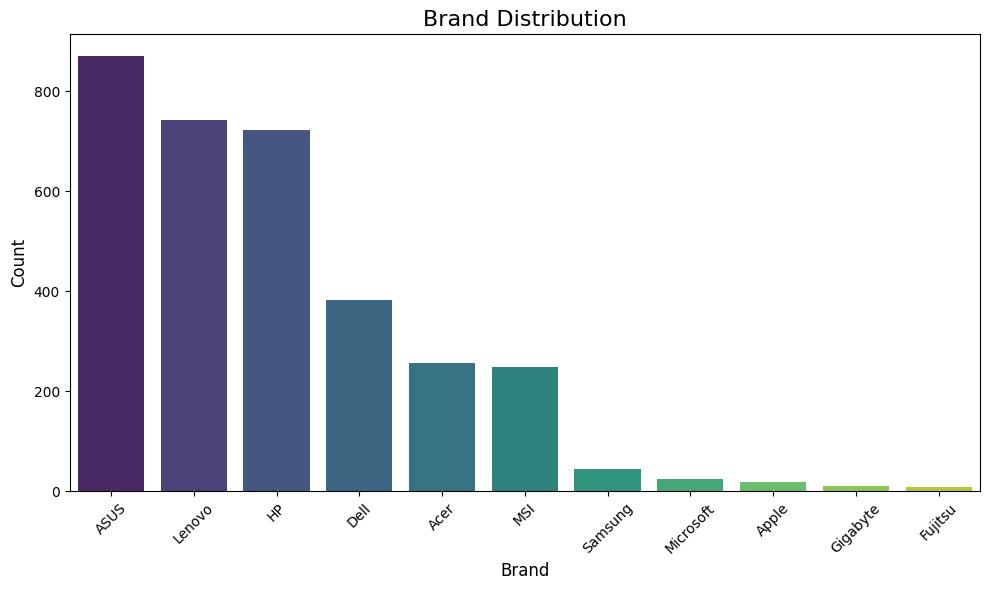

<ipython-input-48-67f9499e3ac4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


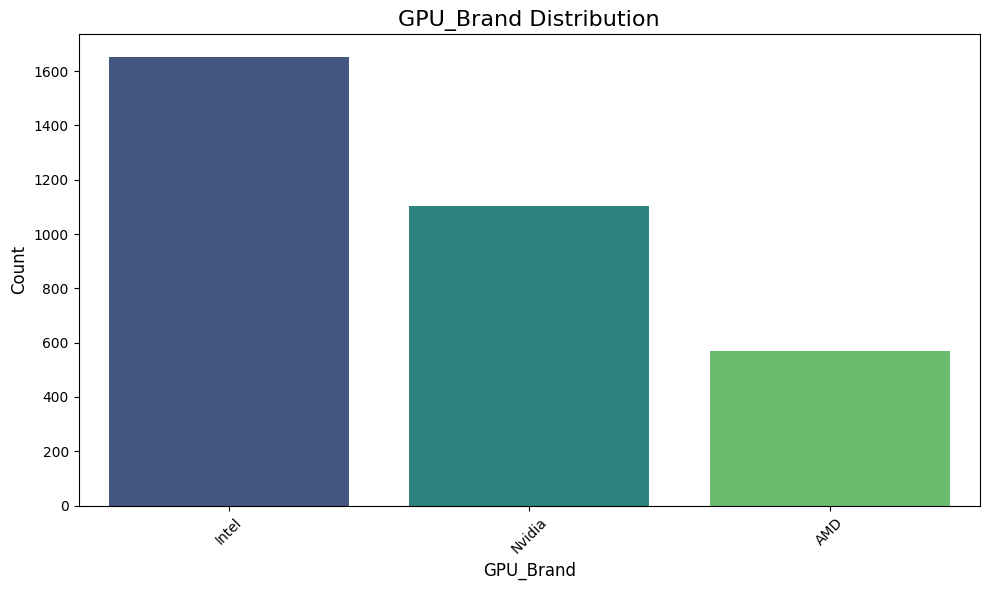

<ipython-input-48-67f9499e3ac4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


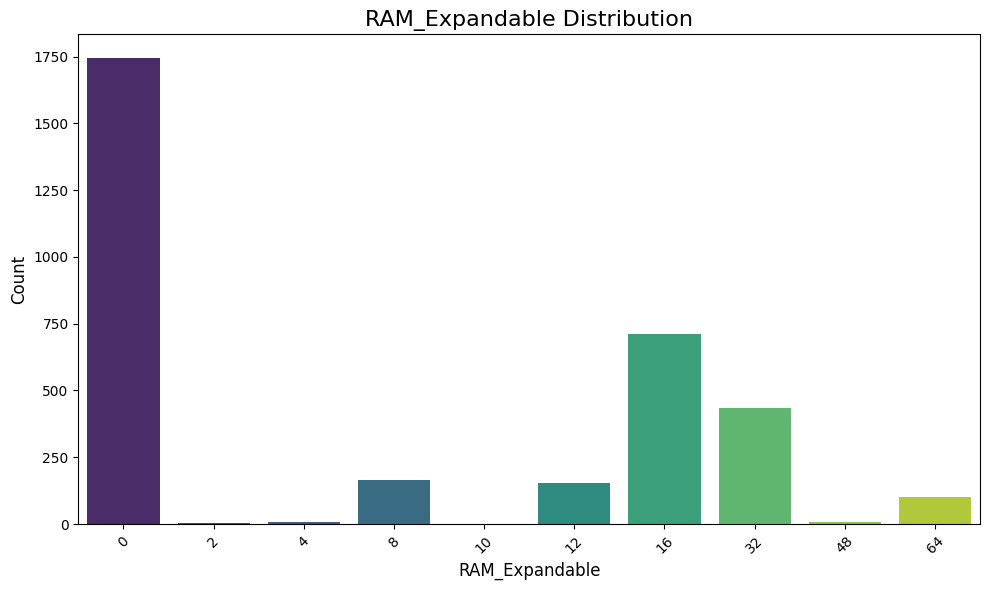

<ipython-input-48-67f9499e3ac4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


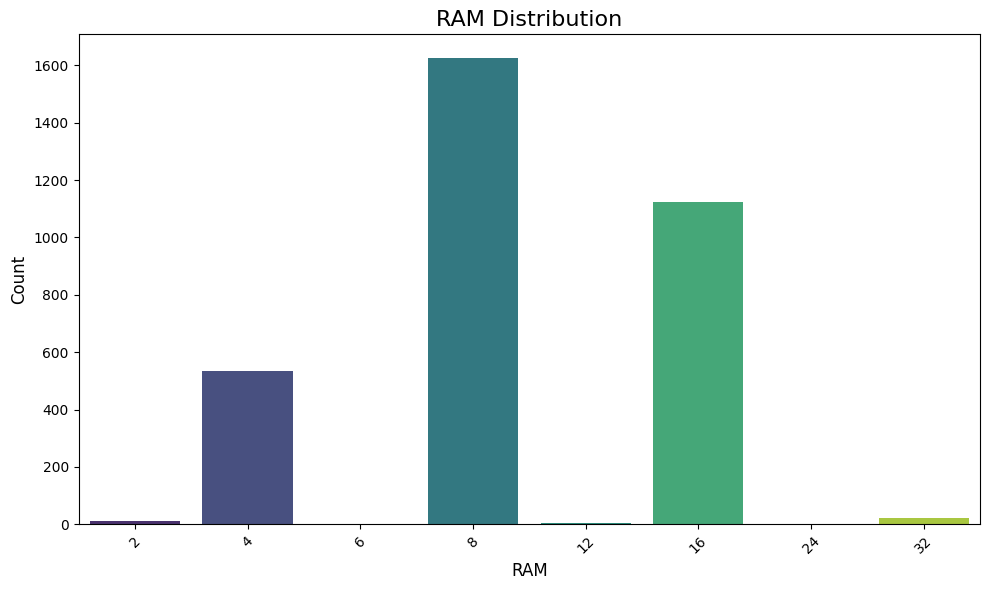

<ipython-input-48-67f9499e3ac4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


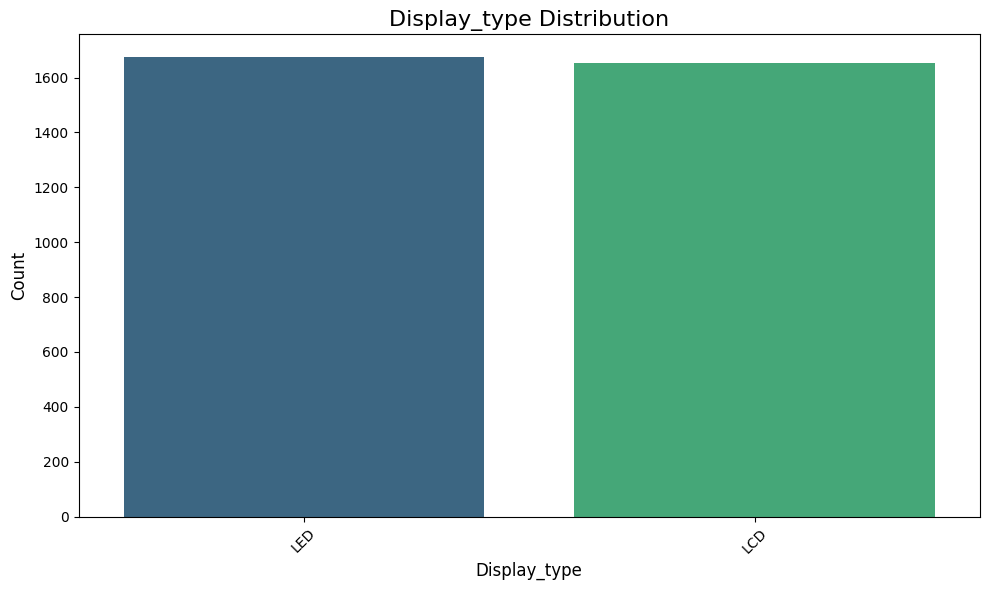

<ipython-input-48-67f9499e3ac4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


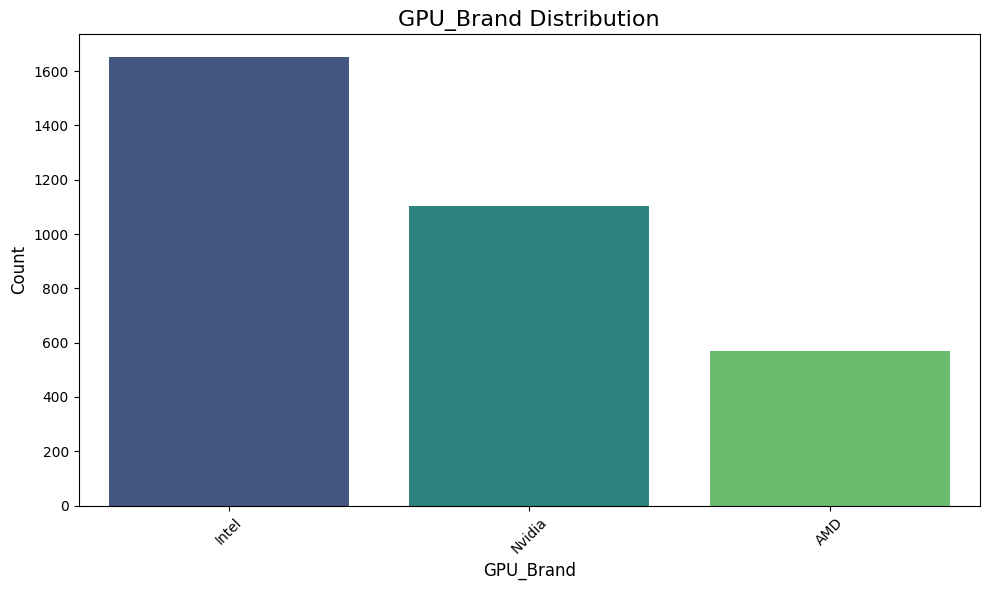

In [ ]:
columns_to_show = ['Brand', 'GPU_Brand', 'RAM_Expandable', 'RAM', 'Display_type', 'GPU_Brand']

for col in columns_to_show:
    plt.figure(figsize=(10, 6))
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")
    plt.title(f'{col} Distribution', fontsize=16)
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import joblib
brand_encoder = LabelEncoder()
cpu_encoder = LabelEncoder()
display_encoder = LabelEncoder()
gpu_encoder = LabelEncoder()
gpu_brand_encoder = LabelEncoder()

#column_mappings = {}

columns_to_encode = ['Brand', 'Processor_Name', 'Display_type', 'GPU', 'GPU_Brand']

df['Brand'] = brand_encoder.fit_transform(df['Brand'])
df['Processor_Name'] = cpu_encoder.fit_transform(df['Processor_Name'])
df['Display_type'] = display_encoder.fit_transform(df['Display_type'])
df['GPU'] = gpu_encoder.fit_transform(df['GPU'])
df['GPU_Brand'] = gpu_brand_encoder.fit_transform(df['GPU_Brand'])


# Save encoders for the deployed model
joblib.dump(brand_encoder, 'brand_encoder.pkl')
joblib.dump(cpu_encoder, 'cpu_encoder.pkl')
joblib.dump(display_encoder, 'display_encoder.pkl')
joblib.dump(gpu_encoder, 'gpu_encoder.pkl')
joblib.dump(gpu_brand_encoder, 'gpu_brand_encoder.pkl')


# If there's time left, save the values to fill the dropdown menu in the web app
# Currently: Ctrl + C and Ctrl + V from the output into the web app code
# Hard to maintain this way




['gpu_brand_encoder.pkl']

In [ ]:
#scaler = RobustScaler()
#scaler = MinMaxScaler()
scaler = StandardScaler()
columns_to_scale = ['RAM', 'SSD', 'HDD', 'RAM_Expandable', 'Adapter']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

import joblib
# save scaler for webapp
joblib.dump(scaler, 'scaler.pkl')

df.head()

,Brand,Price,Processor_Name,RAM_Expandable,RAM,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter
1,7,36289,7,0.095785,-0.456090,4.0,0,15.6,95,0,0.3308,-0.600535,-0.253068
2,3,78500,45,1.461395,1.194263,3.3,0,15.6,17,3,0.3308,-0.600535,-0.466525
3,6,55490,45,-0.177336,-0.456090,4.2,0,15.6,87,2,0.3308,-0.600535,0.007823
5,6,49599,7,0.368907,-0.456090,4.0,0,14,95,0,0.3308,-0.600535,-0.253068
6,1,39990,44,1.461395,-0.456090,2.5,0,14,87,2,0.3308,-0.600535,-0.727416


In [ ]:
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#for column, mapping in column_mappings.items():
#    print(f"\n{column} Mapping:")
#    print(mapping)

print(df.dtypes)

Brand               int64
Price               int64
Processor_Name      int64
RAM_Expandable    float64
RAM               float64
Ghz               float64
Display_type        int64
Display            object
GPU                 int64
GPU_Brand           int64
SSD               float64
HDD               float64
Adapter           float64
dtype: object


Modellezés

In [ ]:
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                   random_state=42, verbose=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best CV Score (MSE):", -random_search.best_score_) # Best cross validation

# Best params
best_rf_model = random_search.best_estimator_
y_test_pred = best_rf_model.predict(X_test)

# Performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse:.2f}")
print(f"Test R2 Score: {test_r2:.2f}")
rmse = np.sqrt(test_mse)
print(f"Test RMSE: {rmse:.2f}")
#price_range = max_price - min_price
#percentage_rmse = (rmse / price_range) * 100
#print(f"RMSE as a percentage (price range): {percentage_rmse:.2f}%")
mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Test MAPE: {mape:.2f}")

best_params = {
    'n_estimators': 150,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_depth': None
}

mean_price = (min_price + max_price) / 2

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Best CV Score (MSE): 193264917.0896387
Test MSE: 168729374.44
Test R2 Score: 0.81
Test RMSE: 12989.59
Test MAPE: 0.15


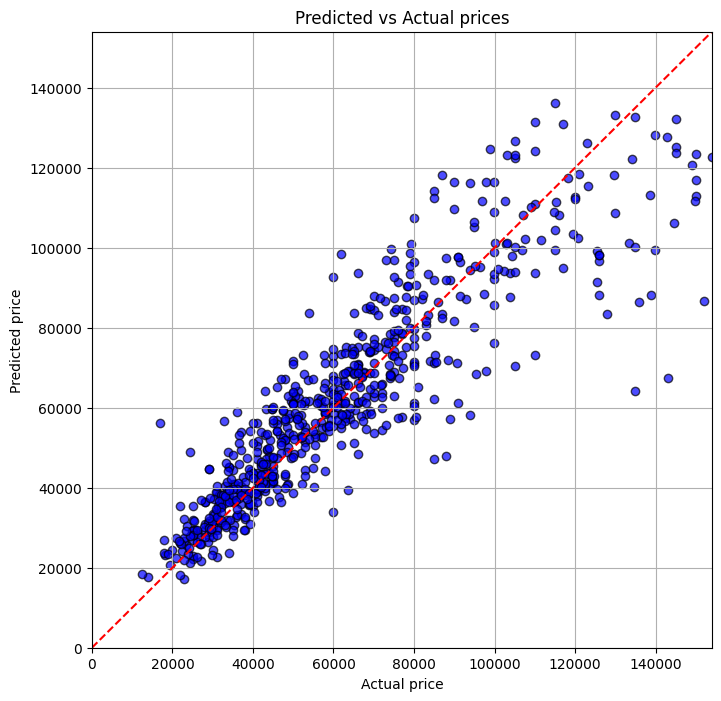

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, edgecolors='k')

max_value = max(y_test.max(), y_test_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual prices')
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.grid()

plt.show()



In [ ]:
import pickle


with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)

print("Model saved successfully.")

Model saved successfully.


In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)


# Performance
lr_test_mse = mean_squared_error(y_test, lr_y_pred)
lr_test_r2 = r2_score(y_test, lr_y_pred)
print(f"Test MSE: {lr_test_mse:.2f}")
print(f"Test R2 Score: {lr_test_r2:.2f}")

lr_rmse = np.sqrt(lr_test_mse)
print(f"Test RMSE: {lr_rmse:.2f}")

lr_mape = mean_absolute_percentage_error(y_test, lr_y_pred)
print(f"Test MAPE: {lr_mape:.2f}")


Test MSE: 282484104.56
Test R2 Score: 0.67
Test RMSE: 16807.26
Test MAPE: 0.21


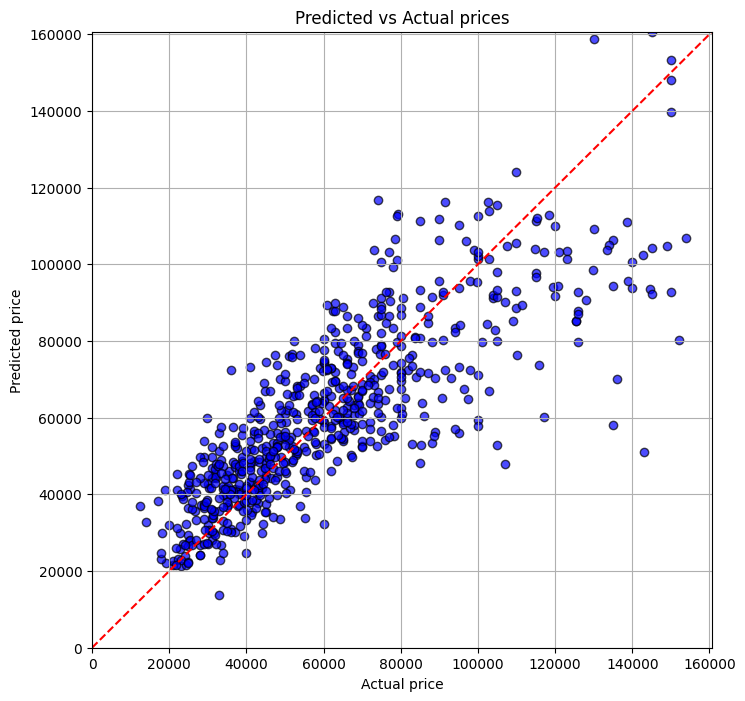

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, lr_y_pred, color='blue', alpha=0.7, edgecolors='k')

max_value = max(y_test.max(), lr_y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual prices')
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.grid()

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

model = Sequential([
    Input(shape=(12,)),
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),

    Dense(64, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(32, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(1, activation='linear')
])


optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/300
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4727651840.0000 - mae: 61984.2422 - val_loss: 4619325440.0000 - val_mae: 61608.5703
Epoch 2/300
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4675265024.0000 - mae: 61623.2344 - val_loss: 4607693312.0000 - val_mae: 61533.3125
Epoch 3/300
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4672078336.0000 - mae: 61859.3438 - val_loss: 4576183808.0000 - val_mae: 61328.6680
Epoch 4/300
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4747821056.0000 - mae: 62252.9648 - val_loss: 4515602432.0000 - val_mae: 60952.8477
Epoch 5/300
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4617247744.0000 - mae: 61533.4883 - val_loss: 4390042624.0000 - val_mae: 60125.3633
Epoch 6/300
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4415024640.0000 - mae: 60055.6719 - val_loss: 4067861248.0000 - val_mae: 57745.6680
Epoch 7/300
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4283199488.0000 - mae: 59151.0547 - val_loss: 3978457600.0000 - val_

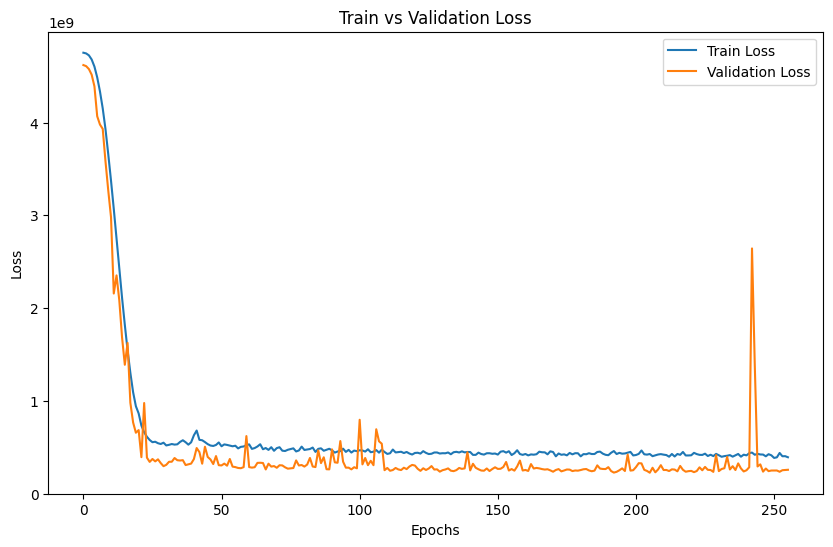

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


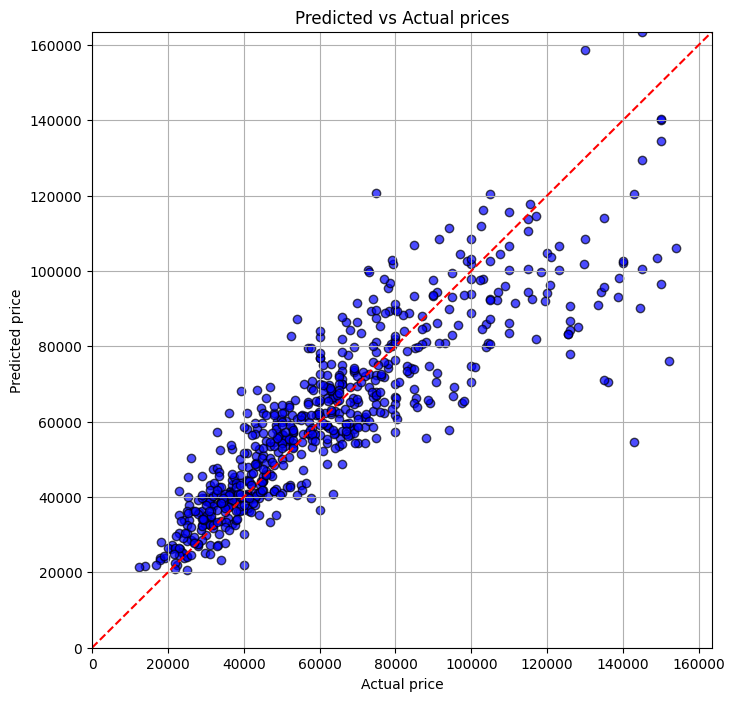

Test MSE: 208283786.24
Test R2 Score: 0.76
Test RMSE: 14432.04
Test MAPE: 0.16


In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')

plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

neural_y_pred = model.predict(X_test, batch_size=32)


plt.figure(figsize=(8, 8))
plt.scatter(y_test, neural_y_pred, color='blue', alpha=0.7, edgecolors='k')


max_value = max(y_test.max(), neural_y_pred.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual prices')
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.grid()

plt.show()



# Performance
neural_test_mse = mean_squared_error(y_test, neural_y_pred)
neural_test_r2 = r2_score(y_test, neural_y_pred)
print(f"Test MSE: {neural_test_mse:.2f}")
print(f"Test R2 Score: {neural_test_r2:.2f}")

neural_rmse = np.sqrt(neural_test_mse)
print(f"Test RMSE: {neural_rmse:.2f}")

neural_mape = mean_absolute_percentage_error(y_test, neural_y_pred)
print(f"Test MAPE: {neural_mape:.2f}")

In [ ]:
model.save('laptop_model.keras')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(666,)
(666,)
avg_y_pred shape: (666,)
y_pred shape: (666,)


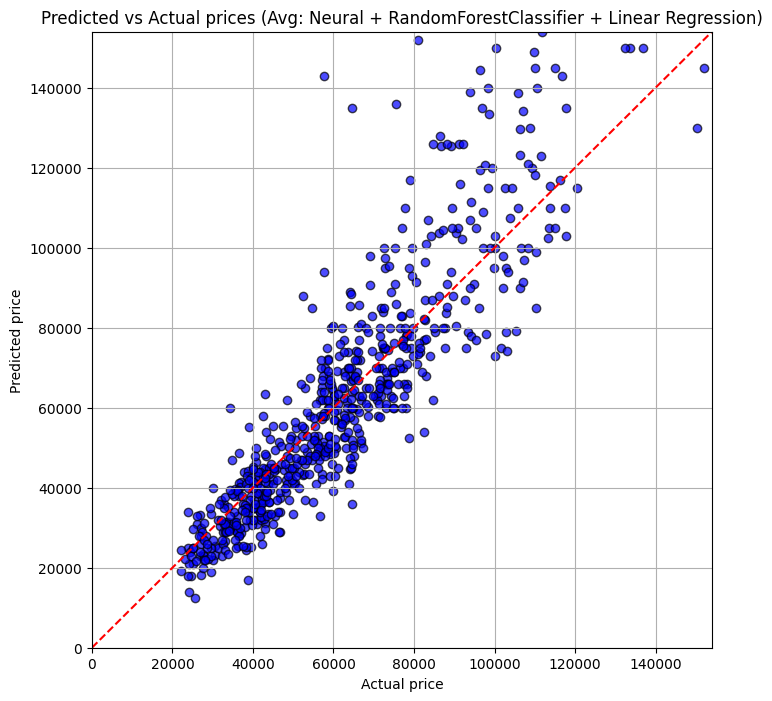

Test MSE: 182743742.51
Test R2 Score: 0.79
Test RMSE: 13518.27
Test MAPE: 0.16


In [ ]:
#Ensemble



neural_y_pred = model.predict(X_test).ravel()
lr_y_pred = lr.predict(X_test)
rf_y_pred = best_rf_model.predict(X_test)

print(neural_y_pred.shape)
print(rf_y_pred.shape)

avg_y_pred = (neural_y_pred + rf_y_pred + lr_y_pred) / 3
#avg_y_pred = (rf_y_pred + lr_y_pred) / 2
#avg_y_pred = (neural_y_pred + rf_y_pred) / 2
#avg_y_pred = (neural_y_pred + lr_y_pred) / 2

print("avg_y_pred shape:", avg_y_pred.shape)
print("y_pred shape:", y_test.shape)

plt.figure(figsize=(8, 8))
plt.scatter(avg_y_pred, y_test, color='blue', alpha=0.7, edgecolors='k')


max_value = max(avg_y_pred.max(), y_test.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--')

plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual prices (Avg: Neural + RandomForestClassifier + Linear Regression)')
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.grid()

plt.show()



avg_test_mse = mean_squared_error(y_test, avg_y_pred)
avg_test_r2 = r2_score(y_test, avg_y_pred)
print(f"Test MSE: {avg_test_mse:.2f}")
print(f"Test R2 Score: {avg_test_r2:.2f}")

avg_rmse = np.sqrt(avg_test_mse)
print(f"Test RMSE: {avg_rmse:.2f}")

avg_mape = mean_absolute_percentage_error(y_test, avg_y_pred)
print(f"Test MAPE: {avg_mape:.2f}")


In [ ]:
# Save models

model.save("neural_model.keras")
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)
with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(lr, file)